# Importing Required Libraries

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the tweets dataset

In [3]:
df = pd.read_csv('Tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.shape

(14640, 15)

In [6]:
df1 = df[:14544]

In [7]:
df1.shape

(14544, 15)

# Data Quality Check

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14544 entries, 0 to 14543
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14544 non-null  int64  
 1   airline_sentiment             14544 non-null  object 
 2   airline_sentiment_confidence  14544 non-null  float64
 3   negativereason                9108 non-null   object 
 4   negativereason_confidence     10443 non-null  float64
 5   airline                       14544 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14544 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14544 non-null  int64  
 10  text                          14544 non-null  object 
 11  tweet_coord                   1012 non-null   object 
 12  tweet_created                 14544 non-null  object 
 13  t

In [9]:
df1.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.454400e+04,14544.000000,10443.000000,14544.000000
mean,5.692159e+17,0.900051,0.638122,0.082921
std,7.810767e+14,0.162904,0.330575,0.747776
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685535e+17,0.692300,0.360450,0.000000
50%,5.694598e+17,1.000000,0.670600,0.000000
75%,5.698923e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


# EDA

In [10]:
temp = df1.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,airline_sentiment,text
0,negative,9108
1,neutral,3084
2,positive,2352


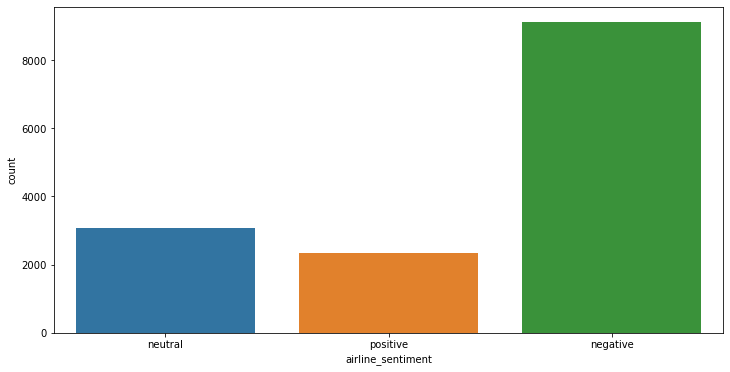

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='airline_sentiment',data=df1)

# Training Model on Twitter Dataset 

**For sentiment analysis we only need text column and from that we will generate a clean text message**

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [13]:
stopword_list = stopwords.words('English')

In [14]:
# stopword_list

In [15]:
df1.text.unique()

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       "@AmericanAir tried ringing but told me to try again Late Flightr. I'm supposed to be leaving in an hour...",
       '@AmericanAir You guys did an amazing job today! Know it’s hard; thanks to Kate Appleton for all her hard work reFlight Booking Problems my friends and me!',
       ".@AmericanAir cover a rental car or refund our ticket? - I'll gladly drive 10 hrs home than be stuck here till Tues!"],
      dtype=object)

In [16]:
Messages = []

# df.shape[0] means total no. of rows
for i in range(df1.shape[0]):
    clean_text = ''
    current_text = word_tokenize(df1['text'].values[i])
    for word in current_text:
        if word == '@' or word == 'VirginAmerica' or word == 'AmericanAir' or word == 'united' or word == 'SouthwestAir' or word == 'USAirways' or word == 'Jetblue' or word == 'Delta' or word == 'delta':
            continue
        if not word in stopword_list:
            clean_text = clean_text + ' ' + word
        
    Messages.append(clean_text)

In [17]:
word

'!'

In [18]:
Messages

[' What dhepburn said .',
 " plus 've added commercials experience ... tacky .",
 " I n't today ... Must mean I need take another trip !",
 " 's really aggressive blast obnoxious `` entertainment '' guests ' faces & amp ; little recourse",
 " 's really big bad thing",
 " seriously would pay $ 30 flight seats n't playing . 's really bad thing flying VA",
 ' yes , nearly every time I fly VX “ ear worm ” ’ go away : )',
 ' Really missed prime opportunity Men Without Hats parody , . https : //t.co/mWpG7grEZP',
 " virginamerica Well , I didn't…but NOW I DO ! : -D",
 " amazing , arrived hour early . You 're good .",
 ' know suicide second leading cause death among teens 10-24',
 ' I & lt ; 3 pretty graphics . much better minimal iconography . : D',
 " This great deal ! Already thinking 2nd trip Australia & amp ; I n't even gone 1st trip yet ! ; p",
 " virginmedia I 'm flying # fabulous # Seductive skies ! U take # stress away travel http : //t.co/ahlXHhKiyn",
 ' Thanks !',
 ' SFO-PDX schedul

In [19]:
df1['cleaned_text'] = Messages

<ipython-input-19-e0653f1ee42f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_text'] = Messages


In [20]:
df1[['text', 'cleaned_text']]

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,What dhepburn said .
1,@VirginAmerica plus you've added commercials t...,plus 've added commercials experience ... tac...
2,@VirginAmerica I didn't today... Must mean I n...,I n't today ... Must mean I need take another...
3,@VirginAmerica it's really aggressive to blast...,'s really aggressive blast obnoxious `` enter...
4,@VirginAmerica and it's a really big bad thing...,'s really big bad thing
...,...,...
14539,@AmericanAir please fix your mobile and deskto...,please fix mobile desktop site allow Canadian...
14540,@AmericanAir tried ringing but told me to try ...,tried ringing told try Late Flightr . I 'm su...
14541,@AmericanAir You guys did an amazing job today...,You guys amazing job today ! Know ’ hard ; th...
14542,.@AmericanAir cover a rental car or refund our...,. cover rental car refund ticket ? - I 'll gl...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer()

In [23]:
cv

CountVectorizer()

In [24]:
x = cv.fit_transform(df1['cleaned_text'])

In [25]:
x

<14544x14960 sparse matrix of type '<class 'numpy.int64'>'
	with 142054 stored elements in Compressed Sparse Row format>

In [26]:
y = df1['airline_sentiment']

In [27]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14539    negative
14540    negative
14541    positive
14542    negative
14543    negative
Name: airline_sentiment, Length: 14544, dtype: object

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10908, 14960), (3636, 14960), (10908,), (3636,))

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb = MultinomialNB()

In [33]:
nb.fit(x_train, y_train)

MultinomialNB()

In [34]:
y_pred = nb.predict(x_test)

In [35]:
type(x_test)

scipy.sparse.csr.csr_matrix

In [36]:
nb.score(x_test, y_test)

0.7513751375137514

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_pred, y_test)

0.7513751375137514

In [39]:
y_pred[:10]

array(['positive', 'negative', 'negative', 'negative', 'negative',
       'neutral', 'negative', 'positive', 'negative', 'negative'],
      dtype='<U8')

# Web Scrapping

In [40]:
import bs4 as bs

In [41]:
import urllib
import urllib.request

In [42]:
def soup_down(url):
    page_url = urllib.request.urlopen(url)
    soup = bs.BeautifulSoup(page_url, 'html.parser')
    
    return soup

# News Channel Website : 1

In [43]:
webpage = soup_down('https://www.foxnews.com/')
webpage.title.text

'Fox News - Breaking News Updates | Latest News Headlines | Photos & News Videos'

In [44]:
web_news =  webpage.findAll('header',{'class':'info-header'})

In [45]:
cat = 1
for category in webpage.findAll('header',{'class':'info-header'}):
    print(cat)
    print(category.text)
    cat = cat + 1

1
TRACKING DELTA -- See the Fox Extreme Weather Center

2
Victor Davis Hanson: Trump must make election about class, not race
3
Is NBA's activism the reason for record-low Finals TV ratings?
4
Trump calls virtual debate vs. Biden 'ridiculous,' says he won't waste his time
5

NC Dem senate candidate 'deeply sorry' over sex scandal, as GOP incumbent Tillis knocks 'hypocrisy'
6
Biden tells reporters when they'll know his stance on court-packing
7
Biden has 'a 50-year career of failure,' Gidley says: 'Such a radical agenda'
8
'We deserve to know': Conservatives knock Biden, Harris for dodging court-packing questions
9

Facial expressions from Harris at VP debate go viral
10
Moderator of 2nd presidential debate tweets 'odd' message to fierce Trump critic, raises bias concerns
11
'Won’t be president for three months': Trump says Harris will replace Biden
12
Pence coasts and media shows its desperation: Ingraham
13
Harris called out after her ‘little history lesson’ on Lincoln
14
Slain teen's

In [46]:
news_title = []
for ntitle in web_news:
    news_title.append(ntitle.text)

In [47]:
news_title

['TRACKING DELTA -- See the Fox Extreme Weather Center\n',
 'Victor Davis Hanson: Trump must make election about class, not race',
 "Is NBA's activism the reason for record-low Finals TV ratings?",
 "Trump calls virtual debate vs. Biden 'ridiculous,' says he won't waste his time",
 "\nNC Dem senate candidate 'deeply sorry' over sex scandal, as GOP incumbent Tillis knocks 'hypocrisy'",
 "Biden tells reporters when they'll know his stance on court-packing",
 "Biden has 'a 50-year career of failure,' Gidley says: 'Such a radical agenda'",
 "'We deserve to know': Conservatives knock Biden, Harris for dodging court-packing questions",
 '\nFacial expressions from Harris at VP debate go viral',
 "Moderator of 2nd presidential debate tweets 'odd' message to fierce Trump critic, raises bias concerns",
 "'Won’t be president for three months': Trump says Harris will replace Biden",
 'Pence coasts and media shows its desperation: Ingraham',
 'Harris called out after her ‘little history lesson’ on 

In [48]:
len(news_title)

196

In [49]:
total_titles =news_title * 72
len(total_titles)

14112

In [50]:
title_df = pd.DataFrame(data = total_titles, columns=['news_heads'])

In [51]:
title_df

,news_heads
0,TRACKING DELTA -- See the Fox Extreme Weather ...
1,Victor Davis Hanson: Trump must make election ...
2,Is NBA's activism the reason for record-low Fi...
3,Trump calls virtual debate vs. Biden 'ridiculo...
4,\nNC Dem senate candidate 'deeply sorry' over ...
...,...
14107,"U.S.Wisconsin protests: Mother, sisters of Alv..."
14108,U.S.Philadelphia shooting leaves at least 1 de...
14109,"U.S.Baltimore bus driver gunned down, killer a..."
14110,U.S.Jonathan Price recently moved back to Texa...


In [52]:
type(title_df)

pandas.core.frame.DataFrame

In [53]:
test = cv.transform(title_df['news_heads'])

In [54]:
test

<14112x14960 sparse matrix of type '<class 'numpy.int64'>'
	with 113400 stored elements in Compressed Sparse Row format>

In [55]:
fox_news_chnl = nb.predict(test)

In [56]:
fox_news_chnl

array(['negative', 'negative', 'neutral', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

# News Channel Website : 2

In [57]:
bbc_url = soup_down('https://www.bbc.com/news')
bbc_url.title.text

'Home - BBC News'

In [58]:
bbc_title = bbc_url.findAll('h3', {'class':'gs-c-promo-heading__title gel-pica-bold nw-o-link-split__text'})

In [59]:
news_title1 = []
for nti in bbc_title:
    news_title1.append(nti.text)

In [60]:
news_title1

['Nobel Peace Prize goes to UN World Food Programme',
 'US man avoids Thai jail over bad resort review',
 "'The cost of protesting has been enormous'",
 'Teary video brings crowds to struggling food stall',
 "Japan theme park unveils 'life-size' Godzilla",
 'Trump ready to return to public life, says doctor',
 'Devastating fire rips through South Korea tower',
 "Australian boss fined over backpacker's farm death",
 "HK commerce chief: security law 'good for stability'",
 'Nigerian serial killer of women sentenced to die',
 "HK commerce chief: security law 'good for stability'",
 'Nigerian serial killer of women sentenced to die',
 "FBI busts 'plot' to abduct US governor",
 'Abducted French aid worker and Mali politician freed',
 'UK economic growth slows despite restaurant boost',
 'BBC World News TV',
 'BBC World Service Radio',
 "Row over 'insult' to India dish Kamala Harris likes",
 "Hong Kong's last authentic junk in troubled waters",
 'Mick Fleetwood surprises viral Dreams TikTok 

In [61]:
len(news_title1)

45

In [62]:
bbc_df = pd.DataFrame(data = news_title1, columns = ['news_heads'])

In [63]:
bbc_df

,news_heads
0,Nobel Peace Prize goes to UN World Food Programme
1,US man avoids Thai jail over bad resort review
2,'The cost of protesting has been enormous'
3,Teary video brings crowds to struggling food s...
4,Japan theme park unveils 'life-size' Godzilla
5,"Trump ready to return to public life, says doctor"
6,Devastating fire rips through South Korea tower
7,Australian boss fined over backpacker's farm d...
8,HK commerce chief: security law 'good for stab...
9,Nigerian serial killer of women sentenced to die


In [64]:
test1 = cv.transform(bbc_df['news_heads'])

In [65]:
bbc_news_chnl = nb.predict(test)

In [66]:
bbc_news_chnl

array(['negative', 'negative', 'neutral', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

# News Channel Website : 3

In [67]:
abc_url = soup_down('https://abcnews.go.com/International')

In [68]:
abc_url.title.text

'International News | Latest World News, Videos & Photos -ABC News  - ABC News'

In [69]:
abc_title = abc_url.findAll('h2')

In [70]:
news_title2 = []
for abc in abc_title:
    news_title2.append(abc.text)

In [71]:
news_title2

['Latest International Headlines',
 "French hostage freed in Mali: Ordeal was 'spiritual retreat'",
 'French aid worker arrives in France after 4 years of being held hostage by Islamic extremists in Mali',
 'UK economy stutters in August despite dining discount',
 'Typhoon off southern Japan, heavy rain expected nationwide',
 "The U.N.'s World Food Program wins Nobel Peace Prize",
 "An American journalist was murdered in Turkey. Why didn't the US investigate?",
 'Spain’s king and prime minister visit Barcelona amid protest',
 'The World Food Program wins the 2020 Nobel Peace Prize for efforts to combat hunger',
 'Afghan female peace negotiator nominated for Nobel Prize',
 'Russia tries to sponsor Nagorno-Karabakh cease-fire talks',
 'German police begin clearing notorious Berlin squat',
 'Latest militia attack in Ethiopia kills 14 civilians',
 "Sentencing procedure continues for Greece's Golden Dawn",
 'Bar or restaurant? The big issue in pandemic-struck Brussels',
 'Armenia-Azerbaijan

In [72]:
len(news_title2)

52

In [73]:
abc_df = pd.DataFrame (data = news_title2, columns = ['news_heads2'])

In [74]:
abc_df

,news_heads2
0,Latest International Headlines
1,French hostage freed in Mali: Ordeal was 'spir...
2,French aid worker arrives in France after 4 ye...
3,UK economy stutters in August despite dining d...
4,"Typhoon off southern Japan, heavy rain expecte..."
5,The U.N.'s World Food Program wins Nobel Peace...
6,An American journalist was murdered in Turkey....
7,Spain’s king and prime minister visit Barcelon...
8,The World Food Program wins the 2020 Nobel Pea...
9,Afghan female peace negotiator nominated for N...


In [75]:
test2 = cv.transform(abc_df['news_heads2'])

In [76]:
test2

<52x14960 sparse matrix of type '<class 'numpy.int64'>'
	with 293 stored elements in Compressed Sparse Row format>

In [77]:
abc_news_chnl = nb.predict(test2)

In [78]:
abc_news_chnl

array(['neutral', 'negative', 'negative', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'positive', 'neutral',
       'neutral', 'negative', 'neutral', 'negative', 'neutral', 'neutral',
       'negative', 'positive', 'neutral', 'neutral', 'negative',
       'positive', 'neutral', 'neutral', 'neutral', 'negative', 'neutral',
       'negative', 'neutral', 'negative', 'positive', 'negative',
       'negative', 'negative', 'neutral', 'negative', 'neutral',
       'positive', 'negative', 'negative', 'neutral', 'negative',
       'positive', 'negative', 'neutral', 'neutral', 'negative',
       'positive', 'negative', 'neutral', 'negative'], dtype='<U8')